# CSE - 6250: Big Data for Healthcare Final Project - Chest XRay

**Proposal**: Detection and Localization of Chest Pathologies using CheXpert Dataset and performing disease correlation with Age Group and Gender

**Authors**: Aditya Bhattacharya <abhattac34@gatech.edu> , Damodara Gadidasu <dgadidasu3@gatech.edu>, Manoj Mahato <mmahato3@gatech.edu> *Team12_ChestXray*

### About the project:

Automated analysis of Chest X-ray images to diagnose various pathologies will help in overcoming the costly, time-consuming and prone to error manual analysis of them, especially using deep learning based approaches. One of such recent efforts in this direction is “A Novel Approach for Multi-Label Chest X-Ray Classification of Common Thorax diseases” by Imane Allaouzi and Mohamed Ben Ahmed which combines the advantages of CNN based feature extraction and problem transformation methods in multi-label classification task. In this project, we seek to replicate various aspects of this paper and will try to improve the results by incorporating new ideas like incorporating gender and age group in disease detection and working on unexplored areas such as incorporating attention mechanism, trying other classifiers like ensemble methods like Random Forest, AdaBoost and XGBoost as base classifier etc. We will be using CheXpert dataset to replicate or improve upon the results in the mentioned paper.

### About the data:

This project was implemented using the CheXpert dataset prepared by Stanford University ML group as mentioned in the [link](https://stanfordmlgroup.github.io/competitions/chexpert/)
The various experiments within this project was conducted using the [downsampled](https://us13.mailchimp.com/mctx/click?url=http%3A%2F%2Fdownload.cs.stanford.edu%2Fdeep%2FCheXpert-v1.0-small.zip&xid=e8c89d129f&uid=55365305&pool=&subject= ) (lower resolution) CheXpert dataset. As mentioned in the referenced [link](https://stanfordmlgroup.github.io/competitions/chexpert/), CheXpert is a large public dataset for chest radiograph interpretation, consisting of 224,316 chest radiographs of 65,240 patients. We retrospectively collected the chest radiographic examinations from Stanford Hospital, performed between October 2002 and July 2017 in both inpatient and outpatient centers, along with their associated radiology reports.

### Description of Project Approach:

<br>

<li> The very initial step that the team started with once the access to the data was obtained is the Exploratory Data Analysis (EDA) The various EDA steps will be in this notebook under the EDA section. From the EDA process we found out that the data-set had labelled data related to 14 medical conditions around the thoraic region. But the data distribution was not all uniform. Also, since there was no confirmed answer of how to handle the uncertain or -1 labelled classes, and the null or empty claases, so these two observations lead to the initial assumption that the final model results could have been skewed if these two challenges are not tackled properly.

<li> So, for this analysis, we have taken the approach of doing individual class wise binary classification, thereby ignoring the -1 or uncertain classes.

<li> Various claasification techniques were applied. And different modelling approaches were applied like 7 layered Dense Neural Network (which we will be refering as LightNet-7), DenseNet121 from scratch, DenseNet121 from pre-trained weights from the ImageNet dataset, and hybrid CNN and Ensemble classification algorithms like Random Forests, AdaBoosts and XGBoost was applied.

<li> The problem of imbalanced dataset, which might add bias to the majority class, was tackled by using upsampling of the minority class using the [SMOTE]<a href>(https://link.springer.com/content/pdf/10.1007/978-3-642-41822-8_42.pdf)</a> technique and Data Augmentation

<li> SMOTE proved to most successful and based on that the result of the best models are shown in this notebook.</li>

**The presentation link for our project can be found at : https://youtu.be/XCHKkCnjcSY**

### Section 0- Importing the required python modules

In [ ]:
import pandas as pd
import seaborn as sns

### Section 1 - Loading the data and exploratory data analysis

In [ ]:
path = ''
train_data = pd.read_csv(path + 'data/train.csv')
display('Taking a peak at the data')
train_data.head()

'Taking a peak at the data'

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
print('Dimensions of the dataset:')
train_data.shape

Dimensions of the dataset:


(223414, 19)

In [ ]:
print('Loading the validation dataset:')
valid_data = pd.read_csv(path + 'data/valid.csv')
valid_data.head()

Loading the validation dataset:


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print('Dimensions of the validation dataset:')
valid_data.shape

Dimensions of the validation dataset:


(234, 19)

In [ ]:
print('Combining both training and validation data to perform exploratory data analysis')
total_data = pd.concat([train_data, valid_data], ignore_index=True)

Combining both training and validation data to perform exploratory data analysis


In [ ]:
print('Combined dataset dimension:')
total_data.shape

Combined dataset dimension:


(223648, 19)

In [ ]:
total_data.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
display('As mentioned above, there are many null or NaN values for the class labels and many uncertain or -1 labelled classes')

'As mentioned above, there are many null or NaN values for the class labels and many uncertain or -1 labelled classes'

'The dataset consists of both frontal and lateral x-ray images and the distribution looks like the following:'

Frontal    191229
Lateral     32419
Name: Frontal/Lateral, dtype: int64


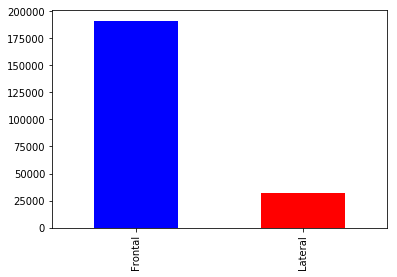

In [ ]:
display('The dataset consists of both frontal and lateral x-ray images and the distribution looks like the following:')
print(total_data['Frontal/Lateral'].value_counts())
total_data['Frontal/Lateral'].value_counts().plot(kind="bar", color=tuple(["b","r"]))

'The data distribution by gender looks like the following'

Male       132764
Female      90883
Unknown         1
Name: Sex, dtype: int64


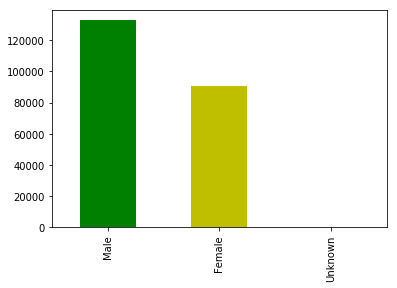

In [ ]:
display('The data distribution by gender looks like the following')
print(total_data['Sex'].value_counts())
total_data['Sex'].value_counts().plot(kind="bar", color=tuple(["g","y"]))

'The data distribution across age-group and gender looks like the following:'

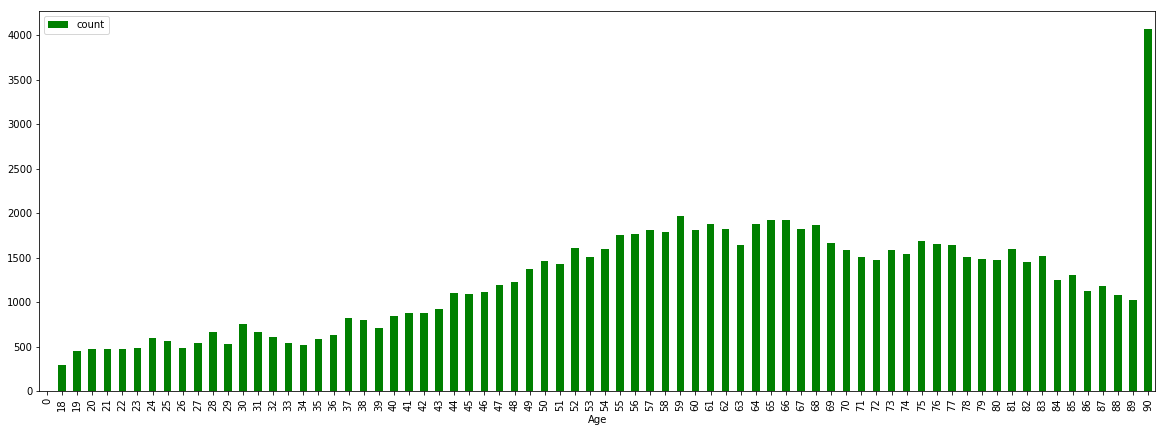

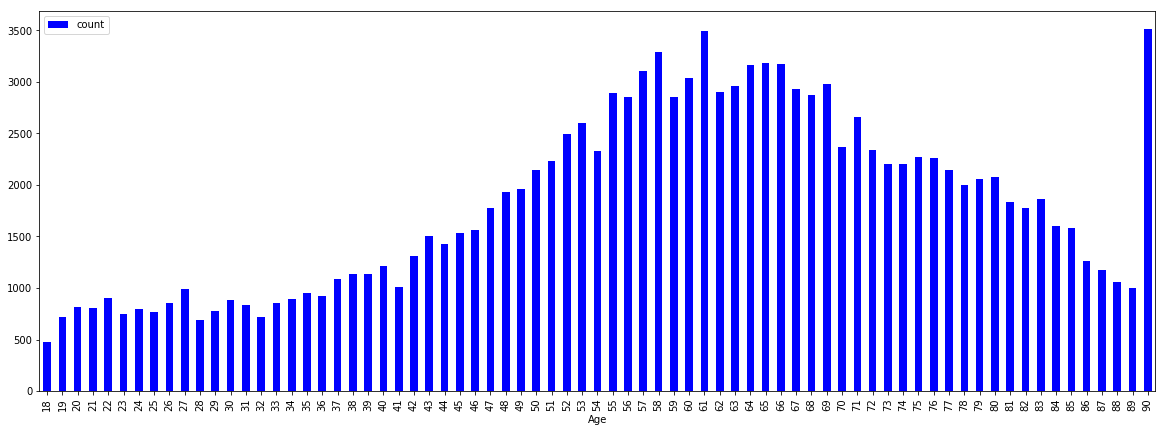

In [ ]:
display('The data distribution across age-group and gender looks like the following:')
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 7
grouped_by_gender_age = total_data[['Sex','Age']].groupby(['Sex','Age']).size().rename('count').reset_index()

ax = grouped_by_gender_age[grouped_by_gender_age['Sex'] == 'Female'].plot.bar(color=tuple(["g","y"]), x = 'Age')
ax = grouped_by_gender_age[grouped_by_gender_age['Sex'] == 'Male'].plot.bar(color=tuple(["b","y"]), x = 'Age')

'Combined stacked plot for gender and age-group distribution:'

<Figure size 1440x504 with 0 Axes>

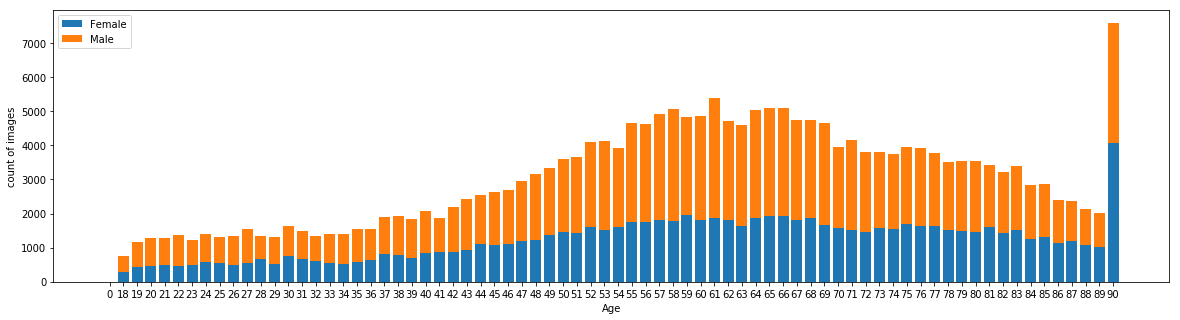

In [ ]:
display('Combined stacked plot for gender and age-group distribution:')
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 7
grouped_by_gender_age = total_data[['Sex','Age']].groupby(['Sex','Age']).size().rename('count').reset_index()
#grouped_by_gender_age.count().unstack().plot(kind="bar", color=tuple(["g","y"]))
ages = grouped_by_gender_age.loc[:,['Age']].drop_duplicates()
plt.clf()
plt.figure(figsize = (20,5))
fem = pd.merge(ages, grouped_by_gender_age[grouped_by_gender_age['Sex'] == 'Female'], how='left', on='Age').fillna(0)
mal = pd.merge(ages, grouped_by_gender_age[grouped_by_gender_age['Sex'] == 'Male'], how='left', on='Age').fillna(0)
fem['Age'] = fem['Age'].astype('str')
mal['Age'] = mal['Age'].astype('str')
ax1 = plt.bar(fem['Age'], fem['count'])
ax2 = plt.bar(mal['Age'], mal['count'], bottom=fem['count'])
plt.ylabel('count of images')
plt.xlabel('Age')
plt.legend((ax1[0], ax2[0]), ('Female', 'Male'))

In [ ]:
display('The distributon of data per each disease class')
total_data.iloc[:,5:].apply(pd.Series.value_counts).transpose()

'The distributon of data per each disease class'

,-1.0,0.0,1.0
No Finding,NaN,196.0,22419.0
Enlarged Cardiomediastinum,12403.0,21763.0,10907.0
Cardiomegaly,8087.0,11282.0,27068.0
Lung Opacity,5598.0,6707.0,105707.0
Lung Lesion,1488.0,1503.0,9187.0
Edema,12984.0,20915.0,52291.0
Consolidation,27742.0,28298.0,14816.0
Pneumonia,18770.0,3025.0,6047.0
Atelectasis,33739.0,1482.0,33456.0
Pneumothorax,3145.0,56567.0,19456.0


'The plot for distributon of data per each disease class based on the number of positive, negative and uncertain classes'

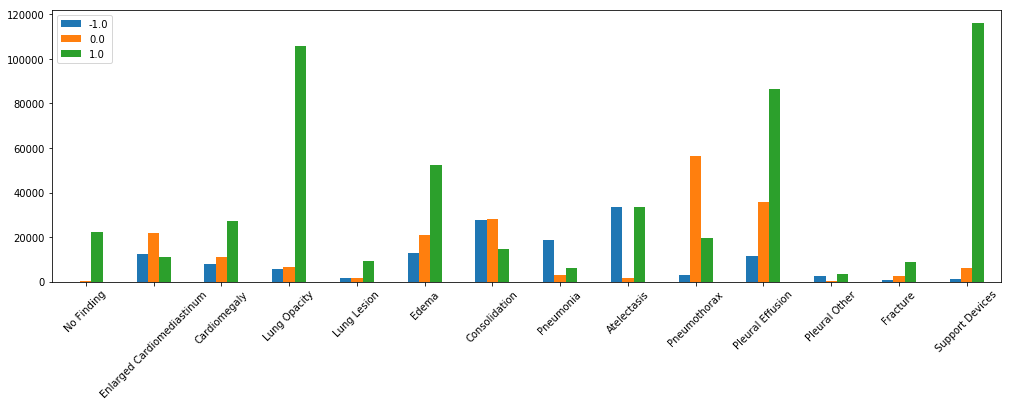

In [ ]:
display('The plot for distributon of data per each disease class based on the number of positive, negative and uncertain classes')

rcParams['figure.figsize'] = 17, 5
total_data.iloc[:,5:].apply(pd.Series.value_counts).transpose().plot.bar(rot=45)

'The plot for distributon of data per each disease class'

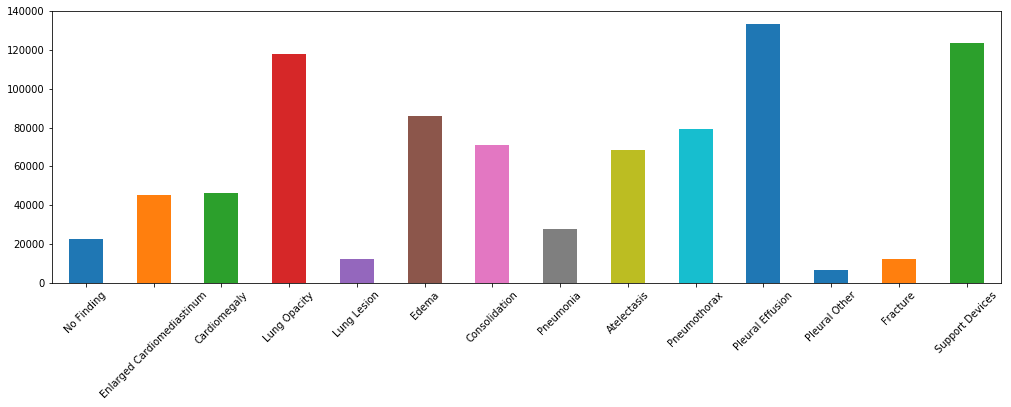

In [ ]:
display('The plot for distributon of data per each disease class')
total_data.iloc[:,5:].apply(pd.Series.value_counts).transpose().sum(axis = 1, skipna = True).plot.bar(rot=45)

### Section 2 - Modelling Approach

**Note : For a detailed modelling approach please refer the individual classwise analysis notebooks under code directory.**

The following models were tried:
1. LightNet-7 : A 7 layered Deep Neural Network
2. DenseNet121 from scratch
3. DenseNet121 using pretrained imagenet weights
4. Hybrid model with Random Forests (including extended features like Age-group, gender and type of image)
5. Hybrid model with AdaBoost (including extended features like Age-group, gender and type of image)
6. Hybrid model with XGBoost (including extended features like Age-group, gender and type of image)


### Section 3 - Results from the Best Models per disease class

#### Performance Metrics

*Note: Considering the model performance metric considered in most of the research papers, showing the result of the accuracy and AUC-ROC scores for the best models obtained so far. But please refer the detailed code section to see the results for each of the six models tried and other performance metrics like Precision, Recall, F1-Score and Hamming Loss were also calculated based on the model results.*

In [ ]:
# importing necessary python packages

import pickle
from keras.models import model_from_json
from keras.utils import to_categorical
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns

best_model_path = 'best_model/'

Using TensorFlow backend.


In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
        lb = LabelBinarizer()
        lb.fit(y_test)
        y_test = lb.transform(y_test)
        y_pred = lb.transform(y_pred)
        return metrics.roc_auc_score(y_test, y_pred, average=average)
        
def evaluate_model_performance_valid_data(y_orig, y_pred):
        accuracy = metrics.accuracy_score(y_orig, y_pred)
        print('Accuracy is:',accuracy)
        
        # AUC Scores
        auc_score = multiclass_roc_auc_score(y_orig, y_pred)
        print('AUC score is:', auc_score)

        cm = metrics.confusion_matrix(y_orig.argmax(axis=1), y_pred.argmax(axis=1))
        print(cm)

        plt.figure(figsize=(5,5))
        sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues');
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
        plt.title(all_sample_title, size = 12)

#### Model Performance on Valid Data-set

In [ ]:
display('Loading validation data-set to validate model performance')

path = ''
valid_data = pd.read_csv(path + 'data/valid.csv')
valid_data.columns

orig_path = 'CheXpert-v1.0-small'
opath_len = len(orig_path)
test_image = []
for image_path in valid_data['Path']:
    img = image.load_img('data' + image_path[opath_len:],target_size=(250,250,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)


test_data = np.array(test_image)

'Loading validation data-set to validate model performance'

**Necessary pre-processing steps needs to be repeated as done during training phase**

In [ ]:
features_transformation = {"Sex":     {"Male": 0, "Female": 1},
                            "Frontal/Lateral": {"Frontal": 0, "Lateral": 1}}

valid_data.replace(features_transformation, inplace=True)
valid_data.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,0,73,0,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,0,70,0,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,0,70,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,0,85,0,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,1,42,0,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
summary_result = []

In [ ]:
added_test_features = []
for ind in valid_data.index:
    added_test_features.append([valid_data['Sex'][ind],valid_data['Age'][ind]/100, valid_data['Frontal/Lateral'][ind]])
    
test_f_array = np.array(added_test_features)
test_label = np.array(valid_data.drop(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA'],axis=1).fillna(0))

### Individual Class-wise Analysis Results:

#### Class - 'No Finding'

Best Model - LightNet-7

Accuracy - 84%

AUC-ROC Score - 0.5

In [ ]:
disease_class_num = 0
ec_test_label = test_label[:,disease_class_num:disease_class_num+1]
print(valid_data.columns[5+disease_class_num:6+disease_class_num])
print(ec_test_label.shape)
print(np.unique(ec_test_label, return_counts=True))
display('Taking a look at the valid data distribution')

Index(['No Finding'], dtype='object')
(234, 1)
(array([0., 1.]), array([196,  38], dtype=int64))


'Taking a look at the valid data distribution'

In [ ]:
summary_result.append(['No Finding',84,0.5,'LightNet-7'])

'For LightNet-7'

Accuracy is: 0.8376068376068376
AUC score is: 0.5
[[196   0]
 [ 38   0]]


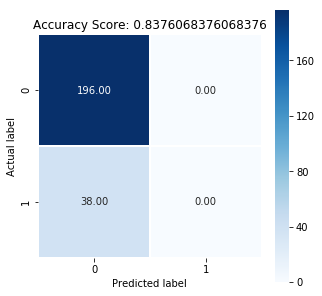

In [ ]:
y_orig = to_categorical(ec_test_label.ravel())

loaded_model =  pickle.load(open(best_model_path + 'no_finding_LN.pkl', 'rb'))

display('For LightNet-7')
pred = loaded_model.predict(test_data)
y_pred = np.where(pred < 0.5, 1.0, 0.0)
evaluate_model_performance_valid_data(y_orig, y_pred)

#### Class - 'Enlarged Cardiomediastinum'

Best Model - LightNet-7

Accuracy - 79%

AUC-ROC Score - 0.79

In [ ]:
disease_class_num = 1
ec_test_label = test_label[:,disease_class_num:disease_class_num+1]
print(valid_data.columns[5+disease_class_num:6+disease_class_num])
print(ec_test_label.shape)
print(np.unique(ec_test_label, return_counts=True))
display('Taking a look at the valid data distribution')

Index(['Enlarged Cardiomediastinum'], dtype='object')
(234, 1)
(array([0., 1.]), array([125, 109], dtype=int64))


'Taking a look at the valid data distribution'

In [ ]:
summary_result.append(['Enlarged Cardiomediastinum',79,0.79,'LightNet-7'])

'For LightNet-7'

Accuracy is: 0.7905982905982906
AUC score is: 0.7928440366972477
[[95 30]
 [19 90]]


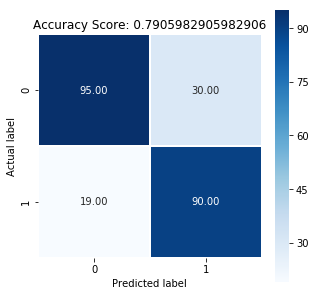

In [ ]:
y_orig = to_categorical(ec_test_label.ravel())

loaded_model =  pickle.load(open(best_model_path + 'enlarged_cardiomediastinum_LN.pkl', 'rb'))

display('For LightNet-7')
pred = loaded_model.predict(test_data)
y_pred = np.where(pred > 0.5, 1.0, 0.0)
evaluate_model_performance_valid_data(y_orig, y_pred)

#### Class - 'Cardiomegaly'

Best Model - LightNet-7

Accuracy - 74%

AUC-ROC Score - 0.71

In [ ]:
disease_class_num = 2
ec_test_label = test_label[:,disease_class_num:disease_class_num+1]
print(valid_data.columns[5+disease_class_num:6+disease_class_num])
print(ec_test_label.shape)
print(np.unique(ec_test_label, return_counts=True))
display('Taking a look at the valid data distribution')

Index(['Cardiomegaly'], dtype='object')
(234, 1)
(array([0., 1.]), array([166,  68], dtype=int64))


'Taking a look at the valid data distribution'

In [ ]:
summary_result.append(['Cardiomegaly',74,0.71,'LightNet-7'])

'For LightNet-7'

Accuracy is: 0.7393162393162394
AUC score is: 0.7034018426647768
[[131  35]
 [ 26  42]]


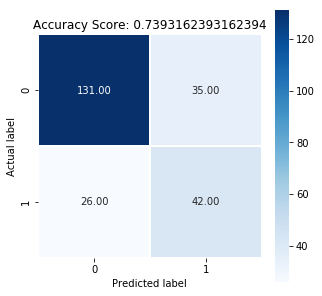

In [ ]:
y_orig = to_categorical(ec_test_label.ravel())

loaded_model =  pickle.load(open(best_model_path + 'cardiomegaly_LN.pkl', 'rb'))

display('For LightNet-7')
pred = loaded_model.predict(test_data)
y_pred = np.where(pred > 0.5, 1.0, 0.0)
evaluate_model_performance_valid_data(y_orig, y_pred)

#### Class - 'Lung Opacity'

Best Model - LightNet-7

Accuracy - 72%

AUC-ROC Score - 0.72

In [ ]:
disease_class_num = 3
ec_test_label = test_label[:,disease_class_num:disease_class_num+1]
print(valid_data.columns[5+disease_class_num:6+disease_class_num])
print(ec_test_label.shape)
print(np.unique(ec_test_label, return_counts=True))
display('Taking a look at the valid data distribution')

Index(['Lung Opacity'], dtype='object')
(234, 1)
(array([0., 1.]), array([108, 126], dtype=int64))


'Taking a look at the valid data distribution'

In [ ]:
summary_result.append(['Lung Opacity',72,0.72,'LightNet-7'])

'For LightNet-7'

Accuracy is: 0.7136752136752137
AUC score is: 0.7169312169312171
[[82 26]
 [41 85]]


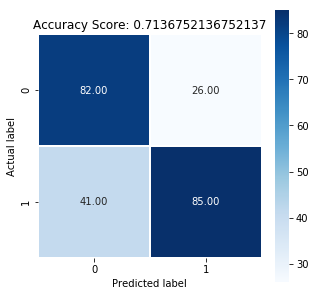

In [ ]:
y_orig = to_categorical(ec_test_label.ravel())

loaded_model =  pickle.load(open(best_model_path + 'lung_opacity_LN.pkl', 'rb'))

display('For LightNet-7')
pred = loaded_model.predict(test_data)
y_pred = np.where(pred > 0.5, 1.0, 0.0)
evaluate_model_performance_valid_data(y_orig, y_pred)

#### Class - 'Lung Lesion'

Best Model - DenseNet121

Accuracy - 47%

AUC-ROC Score - 0.74

In [ ]:
disease_class_num = 4
ec_test_label = test_label[:,disease_class_num:disease_class_num+1]
print(valid_data.columns[5+disease_class_num:6+disease_class_num])
print(ec_test_label.shape)
print(np.unique(ec_test_label, return_counts=True))
display('Taking a look at the valid data distribution')

Index(['Lung Lesion'], dtype='object')
(234, 1)
(array([0., 1.]), array([233,   1], dtype=int64))


'Taking a look at the valid data distribution'

In [ ]:
summary_result.append(['Lung Lesion',47,0.74,'DenseNet-121'])

'For DenseNet121'

Accuracy is: 0.4658119658119658
AUC score is: 0.7317596566523605
[[108 125]
 [  0   1]]


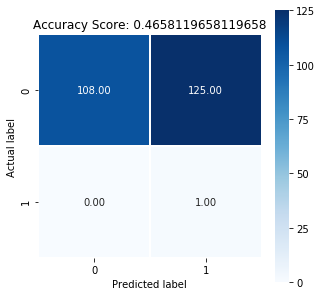

In [ ]:
y_orig = to_categorical(ec_test_label.ravel())

loaded_model =  pickle.load(open(best_model_path + 'lung_lesion_DN.pkl', 'rb'))

display('For DenseNet121')
pred = loaded_model.predict(test_data)
y_pred = np.where(pred > 0.5, 1.0, 0.0)
evaluate_model_performance_valid_data(y_orig, y_pred)

#### Class - 'Edema'

Best Model - LightNet-7

Accuracy - 79%

AUC-ROC Score - 0.77

In [ ]:
disease_class_num = 5
ec_test_label = test_label[:,disease_class_num:disease_class_num+1]
print(valid_data.columns[5+disease_class_num:6+disease_class_num])
print(ec_test_label.shape)
print(np.unique(ec_test_label, return_counts=True))
display('Taking a look at the valid data distribution')

Index(['Edema'], dtype='object')
(234, 1)
(array([0., 1.]), array([189,  45], dtype=int64))


'Taking a look at the valid data distribution'

In [ ]:
summary_result.append(['Edema',79,0.77,'LightNet-7'])

'For LightNet-7'

Accuracy is: 0.7863247863247863
AUC score is: 0.7661375661375662
[[151  38]
 [ 12  33]]


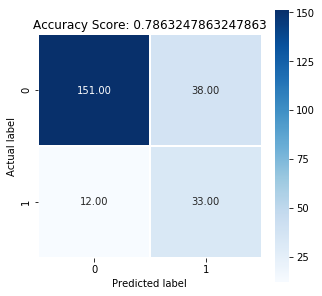

In [ ]:
y_orig = to_categorical(ec_test_label.ravel())

loaded_model =  pickle.load(open(best_model_path + 'edema_LN.pkl', 'rb'))

display('For LightNet-7')
pred = loaded_model.predict(test_data)
y_pred = np.where(pred > 0.5, 1.0, 0.0)
evaluate_model_performance_valid_data(y_orig, y_pred)

#### Class - 'Consolidation'

Best Model - LightNet-7

Accuracy - 68%

AUC-ROC Score - 0.81

In [ ]:
disease_class_num = 6
ec_test_label = test_label[:,disease_class_num:disease_class_num+1]
print(valid_data.columns[5+disease_class_num:6+disease_class_num])
print(ec_test_label.shape)
print(np.unique(ec_test_label, return_counts=True))
display('Taking a look at the valid data distribution')

Index(['Consolidation'], dtype='object')
(234, 1)
(array([0., 1.]), array([201,  33], dtype=int64))


'Taking a look at the valid data distribution'

In [ ]:
summary_result.append(['Consolidation',68,0.81,'LightNet-7'])

'For LightNet-7'

Accuracy is: 0.6794871794871795
AUC score is: 0.8007688828584352
[[127  74]
 [  1  32]]


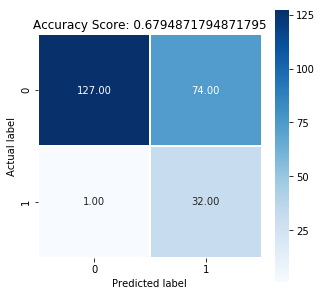

In [ ]:
y_orig = to_categorical(ec_test_label.ravel())

loaded_model =  pickle.load(open(best_model_path + 'consolidation_LN.pkl', 'rb'))

display('For LightNet-7')
pred = loaded_model.predict(test_data)
y_pred = np.where(pred > 0.5, 1.0, 0.0)
evaluate_model_performance_valid_data(y_orig, y_pred)

#### Class - 'Pneumonia'

Best Model - LightNet-7

Accuracy - 64%

AUC-ROC Score - 0.69

In [ ]:
disease_class_num = 7
ec_test_label = test_label[:,disease_class_num:disease_class_num+1]
print(valid_data.columns[5+disease_class_num:6+disease_class_num])
print(ec_test_label.shape)
print(np.unique(ec_test_label, return_counts=True))
display('Taking a look at the valid data distribution')

Index(['Pneumonia'], dtype='object')
(234, 1)
(array([0., 1.]), array([226,   8], dtype=int64))


'Taking a look at the valid data distribution'

In [ ]:
summary_result.append(['Pneumonia',64,0.69,'LightNet-7'])

'For LightNet-7'

Accuracy is: 0.6367521367521367
AUC score is: 0.6913716814159292
[[143  83]
 [  2   6]]


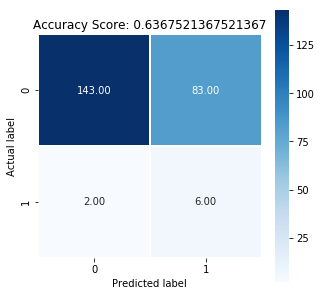

In [ ]:
y_orig = to_categorical(ec_test_label.ravel())

loaded_model =  pickle.load(open(best_model_path + 'pneumonia_LN.pkl', 'rb'))

display('For LightNet-7')
pred = loaded_model.predict(test_data)
y_pred = np.where(pred > 0.5, 1.0, 0.0)
evaluate_model_performance_valid_data(y_orig, y_pred)

#### Class - 'Atelectasis'

Best Model - DenseNet121

Accuracy - 54%

AUC-ROC Score - 0.59

In [ ]:
disease_class_num = 8
ec_test_label = test_label[:,disease_class_num:disease_class_num+1]
print(valid_data.columns[5+disease_class_num:6+disease_class_num])
print(ec_test_label.shape)
print(np.unique(ec_test_label, return_counts=True))
display('Taking a look at the valid data distribution')

Index(['Atelectasis'], dtype='object')
(234, 1)
(array([0., 1.]), array([154,  80], dtype=int64))


'Taking a look at the valid data distribution'

In [ ]:
summary_result.append(['Atelectasis',54,0.59,'DenseNet-121'])

'For DenseNet121'

Accuracy is: 0.5384615384615384
AUC score is: 0.5892857142857143
[[66 88]
 [20 60]]


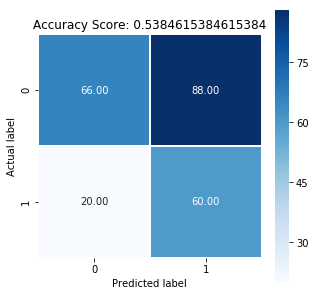

In [ ]:
y_orig = to_categorical(ec_test_label.ravel())

loaded_model =  pickle.load(open(best_model_path + 'atelectasis_DN.pkl', 'rb'))

display('For DenseNet121')
pred = loaded_model.predict(test_data)
y_pred = np.where(pred > 0.5, 1.0, 0.0)
evaluate_model_performance_valid_data(y_orig, y_pred)

#### Class - 'Pneumothorax'

Best Model - LightNet-7

Accuracy - 60%

AUC-ROC Score - 0.43

In [ ]:
disease_class_num = 9
ec_test_label = test_label[:,disease_class_num:disease_class_num+1]
print(valid_data.columns[5+disease_class_num:6+disease_class_num])
print(ec_test_label.shape)
print(np.unique(ec_test_label, return_counts=True))
display('Taking a look at the valid data distribution')

Index(['Pneumothorax'], dtype='object')
(234, 1)
(array([0., 1.]), array([226,   8], dtype=int64))


'Taking a look at the valid data distribution'

In [ ]:
summary_result.append(['Pneumothorax',60 , 0.43,'LightNet-7'])

'For LightNet-7'

Accuracy is: 0.594017094017094
AUC score is: 0.42809734513274333
[[137  89]
 [  6   2]]


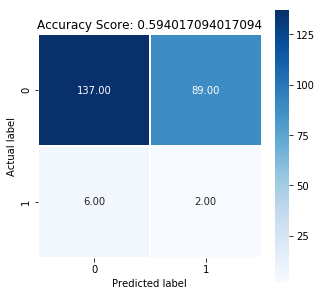

In [ ]:
y_orig = to_categorical(ec_test_label.ravel())
loaded_model =  pickle.load(open(best_model_path + 'pneumothorax_LN.pkl', 'rb'))

display('For LightNet-7')
pred = loaded_model.predict(test_data)
y_pred = np.where(pred > 0.5, 1.0, 0.0)

evaluate_model_performance_valid_data(y_orig, y_pred)

#### Class - 'Pleural Effusion'

Best Model - DenseNet121

Accuracy - 72%

AUC-ROC Score - 0.69

In [ ]:
disease_class_num = 10
ec_test_label = test_label[:,disease_class_num:disease_class_num+1]
print(valid_data.columns[5+disease_class_num:6+disease_class_num])
print(ec_test_label.shape)
print(np.unique(ec_test_label, return_counts=True))
display('Taking a look at the valid data distribution')

Index(['Pleural Effusion'], dtype='object')
(234, 1)
(array([0., 1.]), array([167,  67], dtype=int64))


'Taking a look at the valid data distribution'

In [ ]:
summary_result.append(['Pleural Effusion',72,0.69,'DenseNet-121'])

'For DenseNet121'

Accuracy is: 0.717948717948718
AUC score is: 0.6862096702118151
[[127  40]
 [ 26  41]]


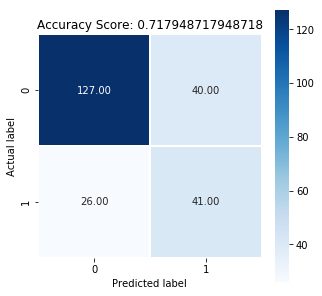

In [ ]:
y_orig = to_categorical(ec_test_label.ravel())

loaded_model =  pickle.load(open(best_model_path + 'pleural_effusion_DN.pkl', 'rb'))

display('For DenseNet121')
pred = loaded_model.predict(test_data)
y_pred = np.where(pred > 0.5, 1.0, 0.0)
evaluate_model_performance_valid_data(y_orig, y_pred)

#### Class - 'Pleural Other'

Best Model - DenseNet121

Accuracy - 71%

AUC-ROC Score - 0.85

In [ ]:
disease_class_num = 11
ec_test_label = test_label[:,disease_class_num:disease_class_num+1]
print(valid_data.columns[5+disease_class_num:6+disease_class_num])
print(ec_test_label.shape)
print(np.unique(ec_test_label, return_counts=True))
display('Taking a look at the valid data distribution')

Index(['Pleural Other'], dtype='object')
(234, 1)
(array([0., 1.]), array([233,   1], dtype=int64))


'Taking a look at the valid data distribution'

In [ ]:
summary_result.append(['Pleural Other',71,0.85,'DenseNet-121'])

Instructions for updating:
Use tf.cast instead.


'For DenseNet121'

Accuracy is: 0.7008547008547008
AUC score is: 0.849785407725322
[[163  70]
 [  0   1]]


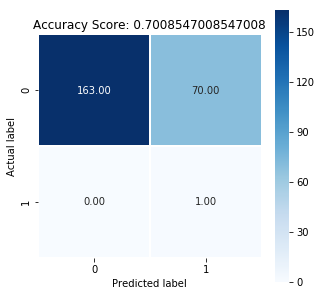

In [ ]:
y_orig = to_categorical(ec_test_label.ravel())

loaded_model =  pickle.load(open(best_model_path + 'pleural_other_DN.pkl', 'rb'))

display('For DenseNet121')
pred = loaded_model.predict(test_data)
y_pred = np.where(pred > 0.5, 1.0, 0.0)
evaluate_model_performance_valid_data(y_orig, y_pred)

#### Class - 'Fracture'

Best Model - LightNet-7

Accuracy - 45%

AUC-ROC Score - 0.73

In [ ]:
disease_class_num = 12
ec_test_label = test_label[:,disease_class_num:disease_class_num+1]
print(valid_data.columns[5+disease_class_num:6+disease_class_num])
print(ec_test_label.shape)
print(np.unique(ec_test_label, return_counts=True))
display('Taking a look at the valid data distribution')

Index(['Fracture'], dtype='object')
(234, 1)
(array([0.]), array([234], dtype=int64))


'Taking a look at the valid data distribution'

In [ ]:
summary_result.append(['Fracture',45,0.73,'LightNet-7'])

'For LightNet-7'

Accuracy is: 0.44871794871794873
AUC score is: 0.7231759656652361
[[  1   0]
 [129 104]]


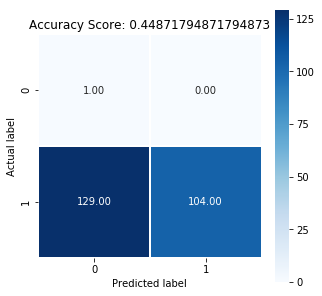

In [ ]:
y_orig = to_categorical(ec_test_label.ravel())
loaded_model =  pickle.load(open(best_model_path + 'fracture_LN.pkl', 'rb'))

display('For LightNet-7')
y_orig[-1] = 0.0
pred = loaded_model.predict(test_data)
y_orig = to_categorical(y_orig)
y_pred = np.where(pred > 0.5, 1.0, 0.0)

evaluate_model_performance_valid_data(y_orig, y_pred)

#### Class - 'Support Devices'

Best Model - LightNet-7

Accuracy - 54%

AUC-ROC Score - 0.5

In [ ]:
disease_class_num = 13
ec_test_label = test_label[:,disease_class_num:disease_class_num+1]
print(valid_data.columns[5+disease_class_num:6+disease_class_num])
print(ec_test_label.shape)
print(np.unique(ec_test_label, return_counts=True))
display('Taking a look at the valid data distribution')

Index(['Support Devices'], dtype='object')
(234, 1)
(array([0., 1.]), array([127, 107], dtype=int64))


'Taking a look at the valid data distribution'

In [ ]:
summary_result.append(['Support Devices',54,0.5,'LightNet-7'])

In [ ]:
y_orig = to_categorical(ec_test_label.ravel())
loaded_model =  pickle.load(open(best_model_path + 'supported_devices_LN.pkl', 'rb'))

'For LightNet-7'

Accuracy is: 0.5341880341880342
AUC score is: 0.5
[[132   0]
 [102   0]]


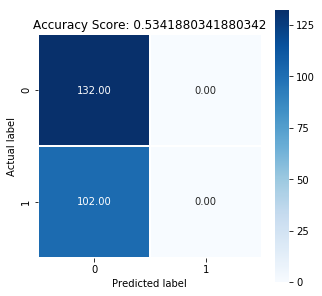

In [ ]:
display('For LightNet-7')
pred = loaded_model.predict(test_data)
y_pred = np.where(pred < 0.5, 1.0, 0.0)

evaluate_model_performance_valid_data(y_orig, y_pred)

#### Results Summary

In [ ]:
pd.DataFrame(summary_result, columns = ['Pathology','Accuracy(%)','AUC-ROC Score','Best Model'])

,Pathology,Accuracy(%),AUC-ROC Score,Best Model
0,No Finding,84,0.50,LightNet-7
1,Enlarged Cardiomediastinum,79,0.79,LightNet-7
2,Cardiomegaly,74,0.71,LightNet-7
3,Lung Opacity,72,0.72,LightNet-7
4,Lung Lesion,47,0.74,DenseNet-121
5,Edema,79,0.77,LightNet-7
6,Consolidation,68,0.81,LightNet-7
7,Pneumonia,64,0.69,LightNet-7
8,Atelectasis,54,0.59,DenseNet-121
9,Pneumothorax,60,0.43,LightNet-7


### Section 4 - Challenges Faced and Future Improvements

1. One of the key challenges faced was how to deal with null values for classification result. Based on initial experiments and exploratory analysis, it was decided to simply drop the null values while doing class-wise analysis.
2. The requirement of a high performing GPU system and the overall infrastructure (including the data pipeline) was an initial challenge, which was finally mitigated with the help of Azure Cloud
3. Dealing with uncertain classes was one of the initial challenges, although the U-Ignore approach as mentioned in reference [4](https://arxiv.org/abs/1711.05225) was followed for this project
4. One of the future improvments can be specific localization with the help of Regional CNN (R-CNN)
5. The main challenge was with how to dela with the uncertain classes and the missing value. A future improvement can be to try other approaches like U-One, U-Zero, U-SelfTrained on the current models and see which approach works better for the disease classes
6. Although SMOTE approach helped us solve the problem of imblanced classes to a great extent but it was very slow, and often the problem of memory exhaustion can come due to it. So, a better way to apply SMOTE will be in mini-batches of the data, hence mini-batch SMOTE will be one approach that we want to try in future, that will help the overall framework/algorithm to run faster.
7. Identifying the correct loss function is sometimes a neglected area. But the correct loss function can reduce the training time and can even optimize the model performance. So, in future we want to explore more loss functions as mentioned in some of the reference research papers.


### Section 5 - Conclusions

1. The novel approach of combining CNN with Ensemble Classification Algorithmns did not work that well. Although the ensemble methods, like XGBoost and AdaBoost worked well with the validation set at training phase but not that good with testing phase valid data
2. The LightNet-7 model was the fastest and yet quite good for majory of the classes
3. SMOTE upsampling minority class approach proved better than data augmentation and helped in reducing bias from majority class 

### Section 6 - References


1. The book, Deep Learning with Python, by Francois Chollet.
2. HongyuWang, Yong Xia. ChestNet: A Deep Neural Network for Classification of Thoracic Diseases on Chest Radiography.
3. Z. Ge, D. Mahapatra, S. Sedai, R. Garnavi, and R. Chakravorty. Chest x-rays classification: A multi-label and fine-grained problem. CoRR, abs/1807.07247, 2018.
4. P. Rajpurkar et al. (2017). ‘‘CheXNet: Radiologist-level pneumonia detection on chest X-rays with deep learning.’’ [Online]. Available: https://arxiv.org/abs/1711.05225
5. J. Irvin et al. (2019). ‘‘CheXpert: A large chest radiograph dataset with uncertainty labels and expert comparison.’’ [Online]. Available: https://arxiv.org/abs/1901.07031
6. Allaouzi, I., Ben Ahmed, M. (2019). A Novel Approach for Multi-Label Chest X-Ray Classification of Common Thorax Diseases. IEEE Access 7(1), 64279-64288
7. H. Liu, L. Wang, Y. Nan, F. Jin, and J. Pu. Sdfn: Segmentation-based deep fusion network for thoracic disease classification in chest x-ray images. arXiv preprint arXiv:1810.12959, 2018.
8. Q. Guan and Y. Huang. Multi-label chest x-ray image classification via category-wise residual attention learning. Pattern Recognition Letters, 2018.
9. Z. Li et al. “Thoracic disease identification and localization with limited supervision”. CVPR, 2018.
10. Multi-label, multi-class classification of chest X-ray images using PyTorch https://github.com/dcela/chexpert
11. Half a million x-rays! First impressions of the Stanford and MIT chest x-ray datasets https://lukeoakdenrayner.wordpress.com/2019/02/25/half-a-million-x-rays-first-impressions-of-the-stanfordand- mit-chest-x-ray-datasets/
12. CheXpert: A Large Chest X-Ray Dataset and Competition; A repository created for the MAP583 Deep Learning project by Gaëtan Dissez & Guillaume Duboc; https://github.com/gaetandi/cheXpert
13. ResNet Keras Framework: https://github.com/keras-team/keras/blob/master/examples/cifar10_resnet.py
14. Managing Imbalanced Data Sets in Multi-label Problems: A Case Study with the SMOTE Algorithm by Giraldo- Forero et al. https://link.springer.com/content/pdf/10.1007/978-3-642-41822-8_42.pdf


**A special mention to the book *Deep Learning with Python, by Francois Chollet* as some of the code and concepts were referenced from there, and for the papers *CheXpert* and *CheXNet***